# Стратегия взаимодействия с клиентами сети фитнес-центов «Культурист-датасаентист»

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

**Цель исследования:**

Разработать рекомендации по повышению качества работы с клиентами:

    выделить целевые группы клиентов;
    предложить меры по снижению оттока;
    определить другие особенности взаимодействия с клиентами.

**Ход исследования**

Данные для исследования мы получим из файла:

    /datasets/gym_churn.csv

Исследование пройдёт в пять этапов:

    Обзор данных.
    Обработка данных.
    Анализ данных.
    Построение модели прогнозирования оттока клиентов.
    Кластеризацию клиентов.   

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
df.info()
display(df.head())
display('Наименование столбцов')
display(df.columns)
display(df.describe())
display('Инофрмация о пропусках')
display(df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


'Наименование столбцов'

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


'Инофрмация о пропусках'

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

'Инофрмация о долях пропущенных значений'

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Представленные данные содержат информацию на месяц до оттока и факт оттока на определённый месяц. 

**Набор данных включает следующие поля:**

*Данные клиента за предыдущий до проверки факта оттока месяц:*

* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

## Обработка данных

### Изменение стиля в наименованиях столбцов

In [5]:
df.columns = df.columns.str.lower()

In [6]:
display('Наименование столбцов')
display(df.columns)

'Наименование столбцов'

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### Изменение типа данных в столбцах на логические

In [7]:
df.agg(['min','max']).T

,min,max
gender,0.000000,1.000000
near_location,0.000000,1.000000
partner,0.000000,1.000000
promo_friends,0.000000,1.000000
phone,0.000000,1.000000
contract_period,1.000000,12.000000
group_visits,0.000000,1.000000
age,18.000000,41.000000
avg_additional_charges_total,0.148205,552.590740
month_to_end_contract,1.000000,12.000000


Столбцы с логическим типом данных:
* 'gender' — пол;
* 'near_location' — проживание или работа в районе, где находится фитнес-центр;
* 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'phone' — наличие контактного телефона;
* 'group_visits' — факт посещения групповых занятий;
* 'churn' — факт оттока в текущем месяце.

Логично произвести изменения на тип данных 'bool', но в дальнейшем это повлияет на возможность построения графика countplot - оставляем без изменений.

### Изменение типа данных в столбцах на целое значение

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [9]:
df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [10]:
df['age'].value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: age, dtype: int64

In [11]:
df['lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
20      7
19      7
18      7
21      5
23      2
24      2
26      2
22      2
31      1
27      1
29      1
Name: lifetime, dtype: int64

In [12]:
df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [13]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

Поменяли типы данных на 'int' в столбце 'Month_to_end_contract' — срок до окончания текущего действующего абонемента выражен в месяцах.

### Анализ на наличие дубликатов

In [14]:
print('Полные дубликаты:',df.duplicated().sum(),
      'или {:.2%}'.format (df.duplicated().sum()/len(df.index)))

Полные дубликаты: 0 или 0.00%


Проверять на неявные дубликаты целесообразно только столбцы с типом данных object. Такие столбцы отсутствуют.

### Вывод

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

При обработаке данных: 
- Произведено изменение стиля в наименованиях столбцов
- Произведено изменение типы данных на 'int' 
- Выявлено что аномалии, а также полные и неявные дубликаты отсутствуют

## Анализ данных  (EDA)

### Распределение данных, средние значения и стандартные отклонения

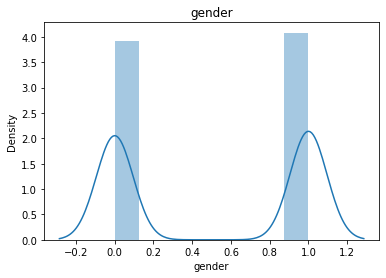

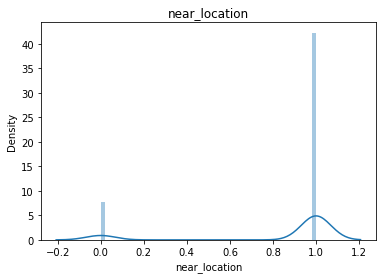

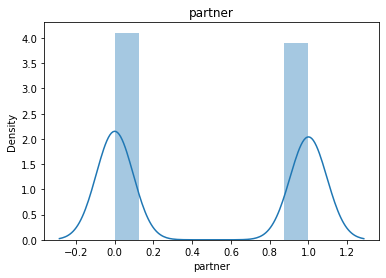

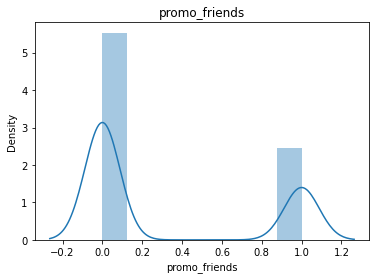

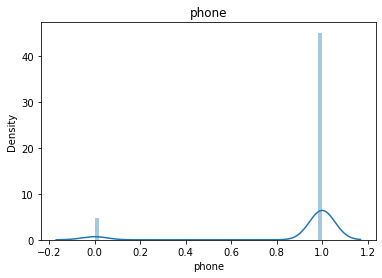

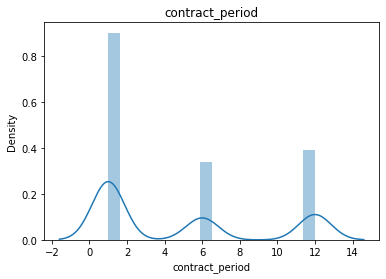

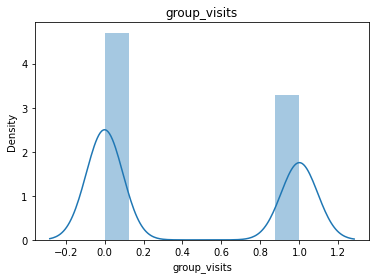

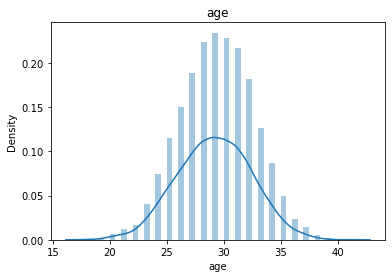

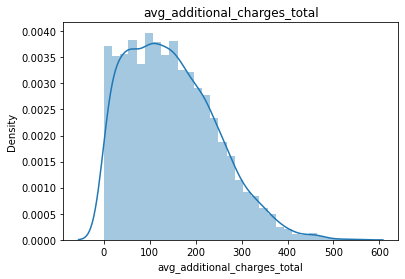

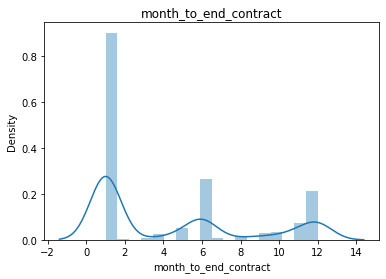

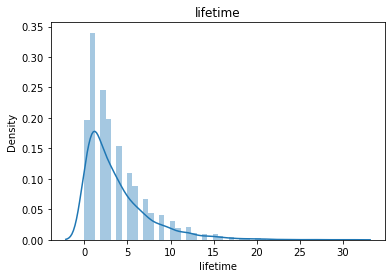

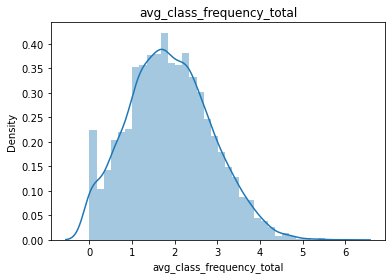

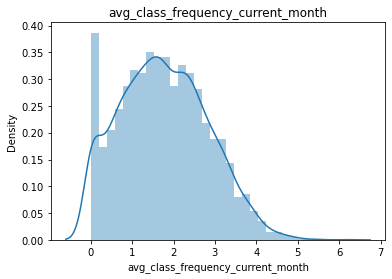

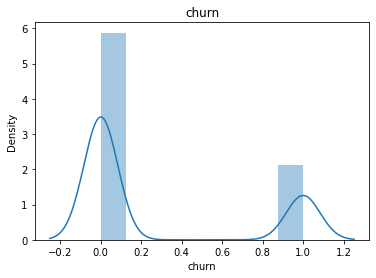

In [16]:
for column in df.columns:
    sns.distplot(df[column])
    plt.title(column)
    plt.show() 

In [17]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [18]:
df.agg(['mean','std']).T

,mean,std
gender,0.510250,0.499957
near_location,0.845250,0.361711
partner,0.486750,0.499887
promo_friends,0.308500,0.461932
phone,0.903500,0.295313
contract_period,4.681250,4.549706
group_visits,0.412250,0.492301
age,29.184250,3.258367
avg_additional_charges_total,146.943728,96.355602
month_to_end_contract,4.322750,4.191297


#### Вывод

**Анализ всех клиентов**

* Распределение по полу примерно одинаково - 51 % и 49 %
* Большинство клиентов живет или работает рядом с фитнес-клубом - 85 %
* Примерно половина клиентов являются сотрудниками партнерских организаций - 49 %
* 30 % клиентов пришли по программе "Приведи друга"
* 90 % клиентов предоставили свои мобильные номера  
* Средняя длительность абонементов клиентов - 4.6 месяцев
* 41 % клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Средние дополнительные расходы на клиента - 146
* Средний срок до окончания договора - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* Доля оттока - 27 %

In [19]:
df.groupby('churn').agg(['mean','std']).T

churn                                            0           1
gender                            mean    0.510037    0.510839
                                  std     0.499984    0.500118
near_location                     mean    0.873086    0.768143
                                  std     0.332933    0.422217
partner                           mean    0.534195    0.355325
                                  std     0.498914    0.478837
promo_friends                     mean    0.353522    0.183789
                                  std     0.478144    0.387495
phone                             mean    0.903709    0.902922
                                  std     0.295040    0.296204
contract_period                   mean    5.747193    1.728558
                                  std     4.716942    2.132371
group_visits                      mean    0.464103    0.268615
                                  std     0.498795    0.443448
age                               mean   29.976523   26.989632
                                  std     3.009933    2.895163
avg_additional_charges_total      mean  158.445715  115.082899
                                  std    99.801599   77.696419
month_to_end_contract             mean    5.283089    1.662582
                                  std     4.363522    1.964593
lifetime                          mean    4.711807    0.990575
                                  std     3.874780    1.110799
avg_class_frequency_total         mean    2.024876    1.474995
                                  std     1.016006    0.694705
avg_class_frequency_current_month mean    2.027882    1.044546
                                  std     1.018994    0.770237

In [20]:
df.groupby('churn')['gender'].agg('count')

churn
0    2939
1    1061
Name: gender, dtype: int64

Отток в текущем месяце - 1061 человек, осталось - 2939 человек.

In [21]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


#### Вывод

**Анализ клиентов с учетом оттока**

* Пол не влияет на отток
* Ближе живущие или работающие клиенты реже попадают в отток
* Среди сотрудников компаний-партнеров отток меньше  
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не влияет на отток
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц
* Оставшиеся пользователи чаще ходят на групповые занятия 
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

### Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

Построим отдельно графики для признаков с числовыми и логическими типами данных.

Признаки с числовым типом данных:

* 'contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'age' — возраст;
* 'avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
* 'month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
* 'avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц.

Признаки с логическим типом данных:
* 'gender' — пол;
* 'near_location' — проживание или работа в районе, где находится фитнес-центр;
* 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'phone' — наличие контактного телефона;
* 'group_visits' — факт посещения групповых занятий;
* 'churn' — факт оттока в текущем месяце.

In [22]:
leave = df[df['churn']==1]
stay = df[df['churn']==0]
numeric_columns = ['contract_period',
                    'age',
                    'avg_additional_charges_total',
                    'month_to_end_contract',
                    'lifetime',
                    'avg_class_frequency_total',
                    'avg_class_frequency_current_month']

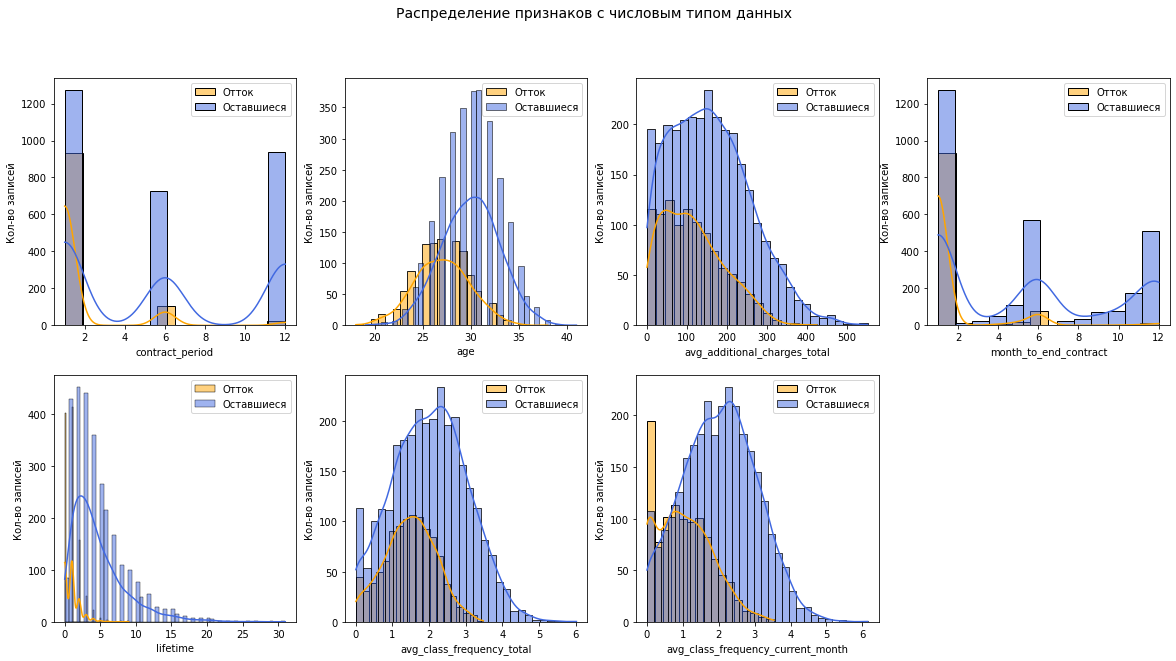

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
fig.suptitle('Распределение признаков с числовым типом данных', fontsize=14)
for column in numeric_columns: 
  ax = axes_list.pop(0)
  sns.histplot(leave[column], kde=True, color = 'orange', ax=ax, label='Отток')
  sns.histplot(stay[column], kde=True, color = 'royalblue', ax=ax, label='Оставшиеся')
  ax.set_ylabel('Кол-во записей')
  ax.legend()
fig.delaxes(axes[1][3])  

#### Вывод



* 'contract_period' - здесь хорошо видно, что чем дольше контракт(абонемент), тем у этих клиентов отток меньше. Вообще основной отток идет среди тех у кого контракт на месяц

* 'age' - до возраста 25-26 лет большая часть склонна уйти, но дальше чем старше клиенты тем склонность остаться сильнее

* 'avg_additional_charges_total' - здесь можно сказать, что доли ушел/остался мало зависят от трат на доп.услуги. Большая часть клиентов тратин не больше 350.

* 'month_to_end_contract' - А здесь отлично видно, что чем больше времени осталось до окончания абонемента, тем желание клиентов продолжать ходить в фитнес сильнее. И вообще основной отток идет среди тех у кого осталься 1 месяц.

* 'lifetime' - очень хорошо видно, что среди тех у кого большой "lifetime" оттока почти нет. Основной отток идет от тех кто ходил до 2 месяцев

* 'avg_class_frequency_total' - единственный признак с распределением похожим на нормальное. Тут интересная ситуация. У тех кто ходит до 2 раз в неделю доли оттока примерно одинаковые, но ситуация резко меняется если клиент ходит 3 раза, а если 4-5 раз(это наверно профессиональные спортсмены), то вообще оттока не видно, но таких клиентов значительно меньше.

* 'avg_class_frequency_current_month' - здесь можно сказать, что чем чаще клиент ходил в клуб за последний месяц, тем и отток меньше

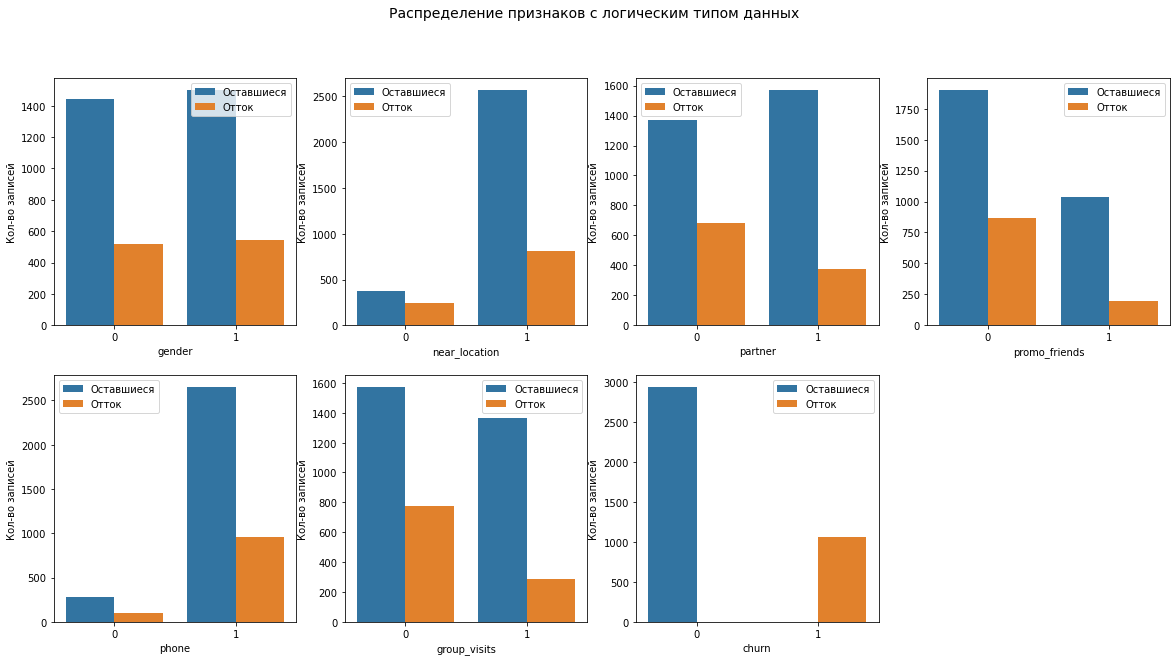

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
fig.suptitle('Распределение признаков с логическим типом данных', fontsize=14)
for column in df.columns:
  if column not in numeric_columns:
    ax = axes_list.pop(0)
    sns.countplot(x = df[column], hue='churn', data=df, ax=ax)
    ax.set_ylabel('Кол-во записей')
    ax.legend(['Оставшиеся', 'Отток'])
fig.delaxes(axes[1][3])     

#### Вывод

* 'gender' - Видно, что мужчин(1) раза в 2,5 больше, чем женщин, но доли оттока у них примерно одинаковые
* 'near_location' - Тех, кто живет ближе значительно больше и среди них доля оставшихся тоже значительно больше
* 'partner' - Здесь видно, что те кто участвовал в партнерской программе (их примерно поровну с теми, кто не участвовал) - они склонны продолжать ходить в фитнес
* 'promo_friends' - Участников промо-акции значительно меньше, но зато доля оставшихся среди них значительно больше 
* 'phone' - видно, что многие оставили свой телефон, но визуально на отток это не влияет
* 'group_visits' - очень большая часть тех кто ходил на групповые занятия склонны остаться

### Матрица корреляций

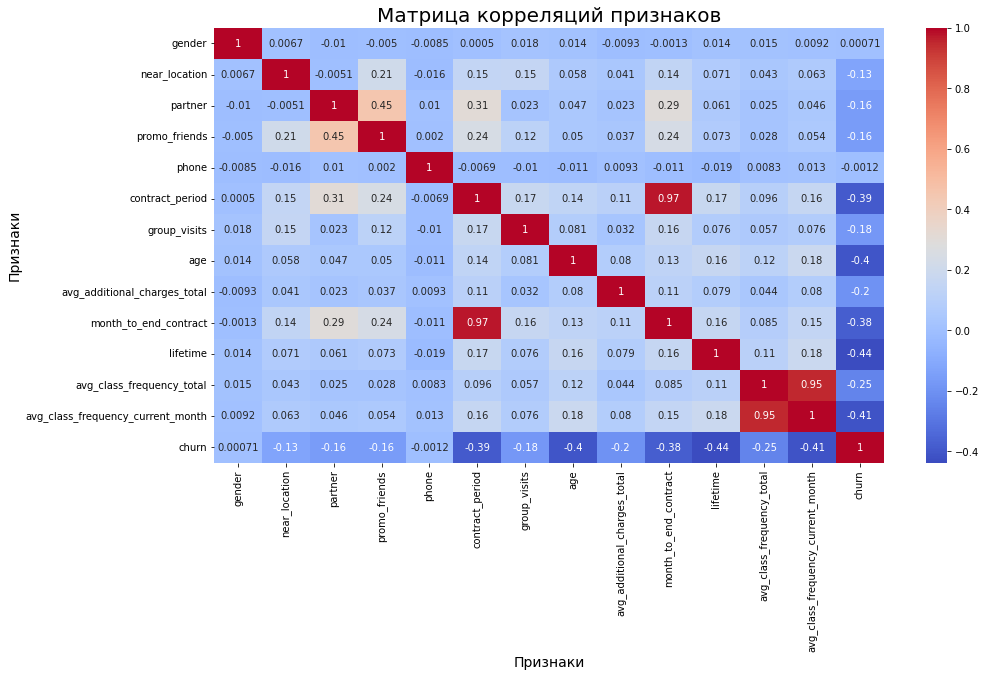

In [25]:
corr_m = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_m, annot = True, cmap='coolwarm')
plt.title('Матрица корреляций признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 14) 
plt.ylabel('Признаки', fontsize = 14) 
plt.show()

#### Вывод

**Мультиколлинеарные признаки:**

* Длительность текущего действующего абонемента (contract_period) коррелирует с сроком до окончания текущего действующего абонемента (month_to_end_contract) с коэффициентом 0.97
* Средняя частота посещения в неделю за все время с начала действия абонемента (avg_class_frequency_total) коррелирует с средней частотой посещений в неделю за предыдущий месяц (avg_class_frequency_current_month) с коэффициентом 0.95
* Корреляция с коэффициентом 0.45 наблюдается между признаком сотрудник компании-партнёра клуба (partner) и признаком факт первоначальной записи в рамках акции «приведи друга (promo_friends). 
* Пол (gender) и наличие контактного телефона (phone) имеют почти нулевые признаки корреляции со всеми показателями.

Кроме того присутствует дисбаланс классов что может привести при классификации к недообучению модели.

### Вывод

Средний возраст клиента 29-30 лет и возрастной признак сильно коррелирует с оттоком, в отток попадают более молодые клиенты. Так же ключевыми переменными являются: время с момента первого обращения в фитнес-центр, количество псещений в месяц, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг. Похоже, что чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе.

## Построение модели прогнозирования оттока клиентов

**Разделим данные на признаки (матрица X) и целевую переменную (y)**

In [26]:
X = df.drop('churn', axis=1)
y = df['churn']

**Разобьем данные на обучающую и валидационную выборку функцией train_test_split()**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Обучим модель на train-выборке способом - логистической регрессией**

In [28]:
model = LogisticRegression(solver='liblinear', random_state=0)  # зададим алгоритм для модели

In [29]:
model.fit(X_train, y_train) # обучим модель

LogisticRegression(random_state=0, solver='liblinear')

In [30]:
probabilities = model.predict_proba(X_test)[:, 1] # воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test) # бинарный прогноз

**Обучим модель на train-выборке способом - случайный лес**

In [31]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

**Оценим метрику accuracy, precision и recall для обеих моделей на валидационной выборке**

In [32]:
print('Метрики для модели логистической регрессии:')
print('Доля правильных ответов - Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions)))
print('Точность - Precision: {:.3f}'.format(precision_score(y_test, predictions)))
print('Полнота - Recall: {:.3f}'.format(recall_score(y_test, predictions)), '\n')

print('Метрики для модели случайный лес:')
print('Доля правильных ответов - Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Точность - Precision: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Полнота - Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели логистической регрессии:
Доля правильных ответов - Accuracy: 0.925
Точность - Precision: 0.863
Полнота - Recall: 0.828 

Метрики для модели случайный лес:
Доля правильных ответов - Accuracy: 0.915
Точность - Precision: 0.839
Полнота - Recall: 0.813


### Вывод

В общем и целом обе модели показали вполне отличные результаты.
Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии.
Модель логистической регрессии показала себя лучше.

## Кластеризацию клиентов

### Дендрограмма - Кластеризация пользователей

In [33]:
# данные стандартизованы ранее
# обучим кодировщик по данным X и сразу их закодируем
X_sc = scaler.fit_transform(X)

In [34]:
# Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 

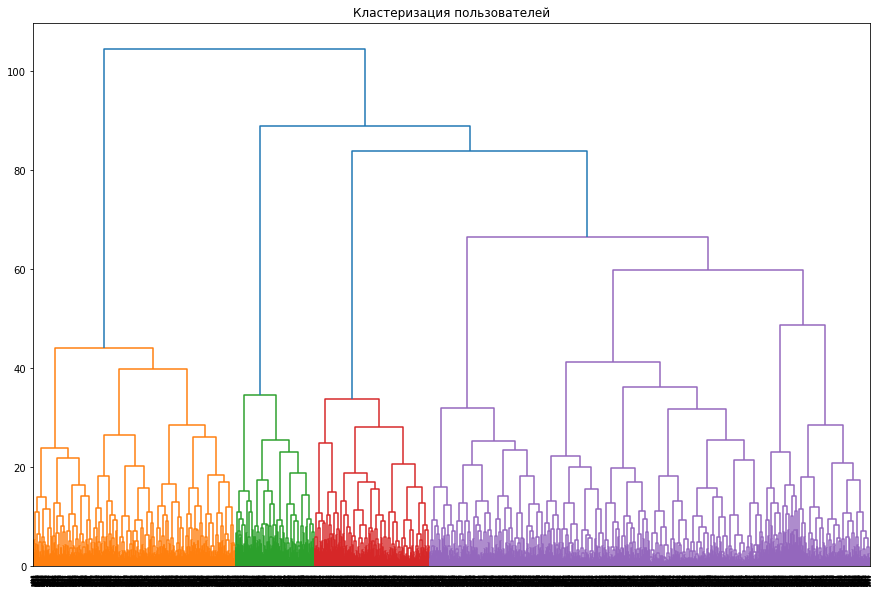

In [35]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show() 

### Кластеры клиентов.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров примим за 5.

In [36]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

Добавим столбец с номерами кластеров в первоначальный датафрейм

In [37]:
df['cluster'] = labels
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,3


In [38]:
df['cluster'].value_counts() 

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

### Cредние значения признаков для кластеров

In [39]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [40]:
cluster_features = df.groupby('cluster').mean().reset_index()

In [41]:
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

,0,1,2,3,4
cluster,0.00,1.00,2.00,3.00,4.00
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66


Описание кластеров:

1. **Кластер 0**
* Отток - 3% - самый низкий
* Живут или работают недалеко от фитнес-центра
* Большинство - это сотрудники компании-партнёра клуба и те кто пришли по акции друзей
* Обладатели долгосрочных абонементов свыше 10 месяцев - лидеры
* В клуб они ходят около 5 месяцев - второй показатель по сроку 
* На дополнительные услуги тратят довольно много свыше 161 ед. - вторые по сумме трат
* До прекращения контракта осталось почти 10 месяцев - самый длительный срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю - вторый по посещаемости 

2. **Кластер 1**
* Отток - 28%
* Живут или работают недалеко от фитнес-центра
* Отсутствует информация о наличие контактного телефона
* Обладатели абонементов с сроком почти в 5 месяцев - вторый           
* На дополнительные услуги тратят довольно много свыше 144 ед.            
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю

3. **Кластер 2**
* Отток - 44% - вторые по доле
* Живут или работают в другом районе
* Преобладают сотрудники компаний-партнеров 79% - лидеры

4. **Кластер 3**
* Отток - 51% - лидеры
* Преобладает женский пол
* Живут или работают непосредственно в здании фитнес-центра
* Наименьший показатель привлечения от партнеров или промо акции
* Мало тратят на услуги в клубе 132 ед. - самый низкий показатель
* Самые молодые
* До прекращения контракта осталось менее 2 месяцев - самый короткий срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 1 раза в неделю - самый низкий показатель 

5. **Кластер 4**
* Отток - 7%
* Преобладает мужской пол
* Живут или работают недалеко от фитнес-центра
* Частично не предоставили номер телефона
* Самые возрастные
* Лидеры по дополнительным тратам
* В клуб они ходят около 5 месяцев - лидеры 
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 3 раза в неделю - лидеры по посещаемости 

### Распределения признаков для кластеров

Построим отдельно графики для признаков с числовыми и логическими типами данных.

Признаки с числовым типом данных:

* 'contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'age' — возраст;
* 'avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
* 'month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
* 'avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц.

Признаки с логическим типом данных:
* 'gender' — пол;
* 'near_location' — проживание или работа в районе, где находится фитнес-центр;
* 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'phone' — наличие контактного телефона;
* 'group_visits' — факт посещения групповых занятий;
* 'churn' — факт оттока в текущем месяце.

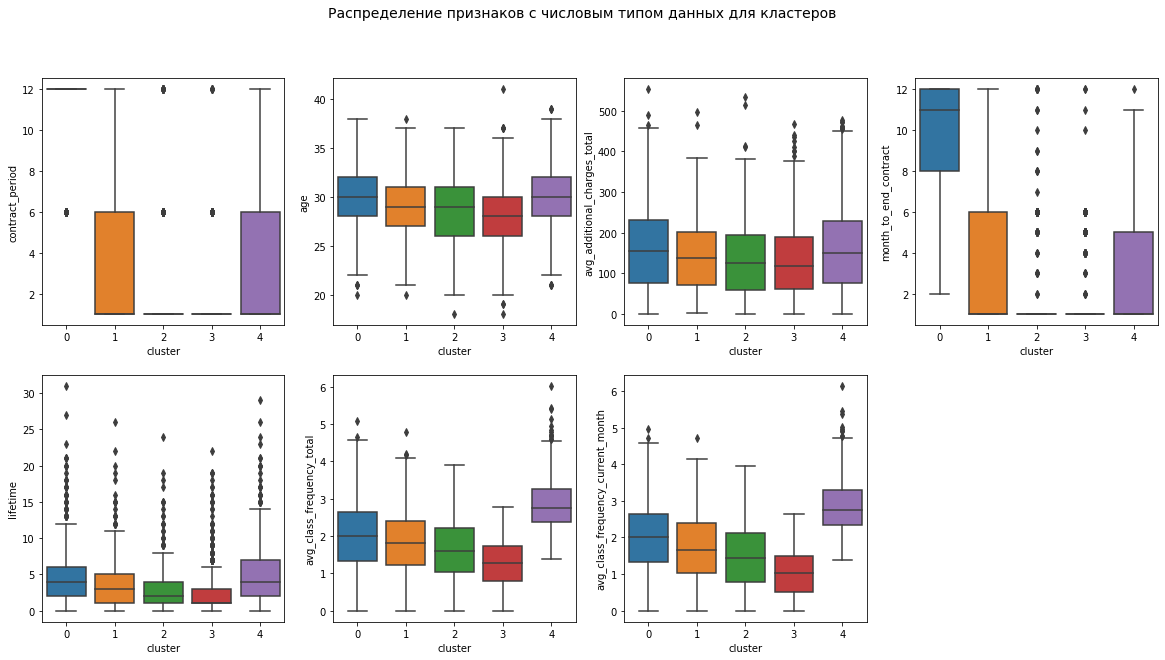

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
fig.suptitle('Распределение признаков с числовым типом данных для кластеров', fontsize=14)
for column in numeric_columns: 
  ax = axes_list.pop(0)
  sns.boxplot (x = 'cluster', y = df[column], data = df, ax=ax)
fig.delaxes(axes[1][3])     

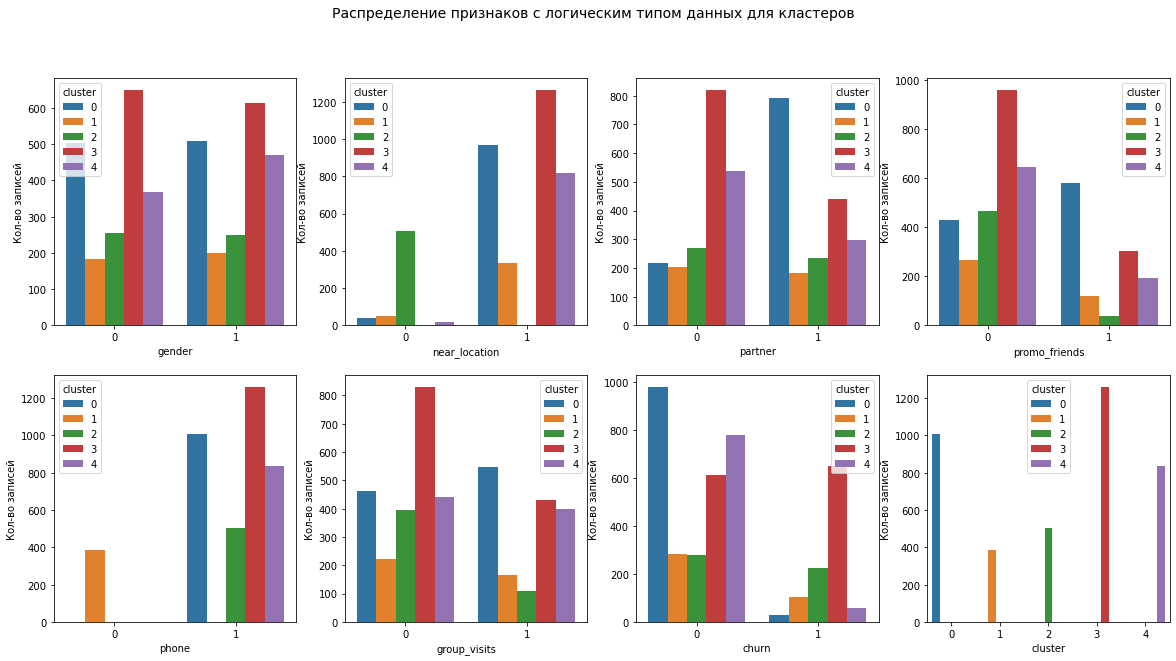

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
fig.suptitle('Распределение признаков с логическим типом данных для кластеров', fontsize=14)
for column in df.columns:
  if column not in numeric_columns:
    ax = axes_list.pop(0)
    sns.countplot(x = df[column], hue='cluster', data=df, ax=ax)
    ax.set_ylabel('Кол-во записей')
    

Графики подтверждают выводы по кластерам

### Доля оттока для каждого полученного кластера

In [44]:
churn_share = df.groupby('cluster')['churn'].agg('sum') / df.groupby('cluster')['churn'].count()
churn_share

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Кластеры 2 и 3 склонны к оттоку, кластеры 0 и 4 более надёжны.

### Вывод

Кластеры 2 и 3 склонны к оттоку, кластеры 0 и 4 более надёжны.

Описание кластеров:

1. **Кластер 0**
* Отток - 3% - самый низкий
* Живут или работают недалеко от фитнес-центра
* Большинство - это сотрудники компании-партнёра клуба и те кто пришли по акции друзей
* Обладатели долгосрочных абонементов свыше 10 месяцев - лидеры
* В клуб они ходят около 5 месяцев - второй показатель по сроку 
* На дополнительные услуги тратят довольно много свыше 161 ед. - вторые по сумме трат
* До прекращения контракта осталось почти 10 месяцев - самый длительный срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю - вторый по посещаемости 

2. **Кластер 1**
* Отток - 28%
* Живут или работают недалеко от фитнес-центра
* Отсутствует информация о наличие контактного телефона
* Обладатели абонементов с сроком почти в 5 месяцев - вторый           
* На дополнительные услуги тратят довольно много свыше 144 ед.            
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю

3. **Кластер 2**
* Отток - 44% - вторые по доле
* Живут или работают в другом районе
* Преобладают сотрудники компаний-партнеров 79% - лидеры

4. **Кластер 3**
* Отток - 51% - лидеры
* Преобладает женский пол
* Живут или работают непосредственно в здании фитнес-центра
* Наименьший показатель привлечения от партнеров или промо акции
* Мало тратят на услуги в клубе 132 ед. - самый низкий показатель
* Самые молодые
* До прекращения контракта осталось менее 2 месяцев - самый короткий срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 1 раза в неделю - самый низкий показатель 

5. **Кластер 4**
* Отток - 7%
* Преобладает мужской пол
* Живут или работают недалеко от фитнес-центра
* Частично не предоставили номер телефона
* Самые возрастные
* Лидеры по дополнительным тратам
* В клуб они ходят около 5 месяцев - лидеры 
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 3 раза в неделю - лидеры по посещаемости 

## Вывод

В проекте был проведен анализ данных о клиентах сети фитнес-центров «Культурист-датасаентист».


**1) Обработка данных:**

Произведено изменение стиля в наименованиях столбцов
Произведено изменение типы данных на 'int'
Выявлено что аномалии, а также полные и неявные дубликаты отсутствуют

**2) EDA:**

Средний возраст клиента 29-30 лет и возрастной признак сильно коррелирует с оттоком, в отток попадают более молодые клиенты. Так же ключевыми переменными являются: время с момента первого обращения в фитнес-центр, количество псещений в месяц, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг. Похоже, что чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе.

**3) Построение модели прогнозирования оттока клиентов (случайный лес и логистической регрессии):**

В общем и целом обе модели показали вполне отличные результаты.
Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии.
Модель логистической регрессии показала себя лучше.

**4) Кластеризация:**

Сформированы типичные портреты клиентов:

*Кластер 0 - самый лучший:*
* Отток - 3% - самый низкий
* Живут или работают недалеко от фитнес-центра
* Большинство - это сотрудники компании-партнёра клуба и те кто пришли по акции друзей
* Обладатели долгосрочных абонементов свыше 10 месяцев - лидеры
* В клуб они ходят около 5 месяцев - второй показатель по сроку
* На дополнительные услуги тратят довольно много свыше 161 ед. - вторые по сумме трат
* До прекращения контракта осталось почти 10 месяцев - самый длительный срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю - вторый по посещаемости

*Кластер 1 – средний:*
* Отток - 28%
* Живут или работают недалеко от фитнес-центра
* Отсутствует информация о наличие контактного телефона
* Обладатели абонементов с сроком почти в 5 месяцев - вторый
* На дополнительные услуги тратят довольно много свыше 144 ед.
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 2 раза в неделю

*Кластер 2 - плохой:*
* Отток - 44% - вторые по доле
* Живут или работают в другом районе
* Преобладают сотрудники компаний-партнеров 79% - лидеры

*Кластер 3 - самый плохой:*
* Отток - 51% - лидеры
* Преобладает женский пол
* Живут или работают непосредственно в здании фитнес-центра
* Наименьший показатель привлечения от партнеров или промо акции
* Мало тратят на услуги в клубе 132 ед. - самый низкий показатель
* Самые молодые
* До прекращения контракта осталось менее 2 месяцев - самый короткий срок использования
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 1 раза в неделю - самый низкий показатель

Кластер 4 - очень хороший кластер:
* Отток - 7%
* Преобладает мужской пол
* Живут или работают недалеко от фитнес-центра
* Частично не предоставили номер телефона
* Самые возрастные
* Лидеры по дополнительным тратам
* В клуб они ходят около 5 месяцев - лидеры
* Средняя частота посещений в неделю за все время с начала действия абонемента ~ 3 раза в неделю - лидеры по посещаемости

Проанализированы основные признаки, наиболее сильно влияющие на отток. Это признак проживание или работа в районе, где находится фитнес-центр, признак факт первоначальной записи в рамках акции «приведи друга», признак факт не посещения групповых занятий, признак время с момента первого обращения в фитнес-центр, молодость, наименьшие дополнительные траты и низкая посещаемость.

**Выводы на основании этих признаков:**
1.	Если клиент стал реже ходить на групповые тренировки, то есть большой шанс на отток клиента. 
2.	Если клиент живет далеко, и ему требуется время на дорогу, то вероятность оттока выше, на удержание таких клиентов следует направить больше усилий.
3.	Если клиент пришел сам по себе, не по акции "Приведи друга", то есть шанс, что он уйдет. Таких клиентов следует заинтересовать групповыми занятиями, так как коллективный спорт и новые знакомства стимулируют клиентов чаще и дольше ходить в фитнес-клубы, так как происходит завязывание и укрепление новых социальных связей.
4.	Те, кто в клуб пришел недавно, могут остаться незаинтересованными и в скором времени покинуть клуб, поэтому на "свежих" клиентов нужно направить больше усилий по удержанию, так как атмосфера клуба, обстановка и персонал для них новы, нужно в первое время окружить их бОльшим вниманием и заботой, чтобы клиент почувствовал себя комфортно и привык к новому месту.

**Примеры реализации принципов взаимодействия с клиентами и их удержания в виде маркетинговых действий:**
1.	Взаимодействие в соцсетях: активное ведение страниц клуба в соцсетях и продвижение. Создать атмосферу, чтобы клиенты ощущали чувство принадлежности к сообществу клуба. 
2.	Улучшение и поддержание интерьера клуба и работоспособности тренажеров, чтобы клиентам было так же комфортно заниматься в нем, как раньше.
3.	Проведение коллективных активностей в клубе (бесплатные тренировки по субботам, различные мероприятия после занятий или по вечерам; организация специальных фитнес-мероприятий).
4.	Индивидуальный подход к клиентам (заинтересованность их успехами, предложение советов и помощи, чтобы их поддержать). Так клиенты будут знать, что они нам небезразличны.
